<a href="https://colab.research.google.com/github/dhanakakani/Dhana_INFO5502_Spring2022/blob/master/Wine_Quality_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.model_selection import train_test_split  # to split the data into test and train
from sklearn.preprocessing import StandardScaler #transform the data with mean 0 and sd=1

#I used above mentioned libraries to get started and perform the operations.

In [2]:
from google.colab import files
uploading=files.upload()

Saving winequality-red.csv to winequality-red.csv


In [3]:
wine = pd.read_csv("winequality-red.csv")
#In this Wine data set is imported with help of pandas as pd and stored in wine

In [4]:
wine
#Displaying the wine data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
wine = wine.drop_duplicates()
#This step will drop the data which have duplicate data

In [6]:
wine
#Displays data after removing the duplicates

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
wine.corr()['quality']
#Checking the correlation of all the variables in wine with respect to quality 

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
Name: quality, dtype: float64

In [8]:
y = wine['quality']
#Assigning the complete quatity data to y

In [ ]:
y
#Displaying y data

0       5
1       5
2       5
3       6
5       5
       ..
1593    6
1594    5
1595    6
1597    5
1598    6
Name: quality, Length: 1359, dtype: int64

In [ ]:
x = wine.iloc[:, :-1]
#Here I used iloc function to select all the rows and columns except the last column which is quality that is assigned to y in prevoius cell

In [ ]:
x
#Displaying x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y, train_size = 0.8)
#After assigning the data, In this to split the data into train and test i used train_test_split()

In [ ]:
x_train
#we can check if the data is divided as per the request

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
1235,6.0,0.33,0.32,12.9,0.054,6.0,113.0,0.99572,3.30,0.56,11.50
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55
833,11.6,0.47,0.44,1.6,0.147,36.0,51.0,0.99836,3.38,0.86,9.90
1227,9.0,0.58,0.25,2.0,0.104,8.0,21.0,0.99769,3.27,0.72,9.60
1588,7.2,0.66,0.33,2.5,0.068,34.0,102.0,0.99414,3.27,0.78,12.80
...,...,...,...,...,...,...,...,...,...,...,...
796,8.7,0.46,0.31,2.5,0.126,24.0,64.0,0.99746,3.10,0.74,9.60
134,7.9,1.04,0.05,2.2,0.084,13.0,29.0,0.99590,3.22,0.55,9.90
1004,8.2,0.43,0.29,1.6,0.081,27.0,45.0,0.99603,3.25,0.54,10.30
1535,7.0,0.55,0.13,2.2,0.075,15.0,35.0,0.99590,3.36,0.59,9.70


In [ ]:
x_test
#Displaying x_test data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
344,11.9,0.570,0.50,2.60,0.082,6.0,32.0,1.00060,3.12,0.78,10.7
838,10.1,0.310,0.35,1.60,0.075,9.0,28.0,0.99672,3.24,0.83,11.2
830,7.5,0.685,0.07,2.50,0.058,5.0,9.0,0.99632,3.38,0.55,10.9
1263,8.2,0.780,0.00,2.20,0.089,13.0,26.0,0.99780,3.37,0.46,9.6
326,11.6,0.530,0.66,3.65,0.121,6.0,14.0,0.99780,3.05,0.74,11.5
...,...,...,...,...,...,...,...,...,...,...,...
1556,6.6,0.880,0.04,2.20,0.066,12.0,20.0,0.99636,3.53,0.56,9.9
733,7.0,0.450,0.34,2.70,0.082,16.0,72.0,0.99800,3.55,0.60,9.5
1312,8.0,1.180,0.21,1.90,0.083,14.0,41.0,0.99532,3.34,0.47,10.5
346,6.6,0.815,0.02,2.70,0.072,17.0,34.0,0.99550,3.58,0.89,12.3


In [ ]:
mod = LogisticRegression(max_iter = 6000)
mod.fit(x_train,y_train)
#After splitting the data into required portion, I used logisticregression model and stored it in mod. max_iter is used when the data requires more iteration to complete its evaluation
#then we can fit the x_train and y_train data into the model 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(max_iter=6000)

In [ ]:
pred = mod.predict(x_test)
#predicting the model with x_test data

In [ ]:
pred
#Displaying the predicted values

array([6, 6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 5, 6, 6, 6,
       5, 5, 6, 7, 6, 6, 5, 5, 6, 5, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 6,
       6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 6, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6,
       6, 5, 6, 5, 6, 6, 5, 5, 5, 6, 7, 5, 5, 7, 6, 5, 6, 5, 6, 6, 6, 5,
       5, 5, 5, 5, 6, 6, 5, 6, 6, 6, 6, 6, 6, 6, 5, 5, 7, 5, 7, 5, 5, 5,
       5, 6, 5, 5, 5, 6, 6, 6, 6, 5, 5, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 6,
       6, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 7,
       6, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 7, 6,
       6, 5, 5, 5, 5, 6, 6, 6, 5, 5, 6, 5, 5, 5, 6, 6, 5, 5, 6, 5, 6, 6,
       5, 6, 6, 5, 5, 5, 6, 6])

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
CM = confusion_matrix(y_test,pred)
Accuracy = accuracy_score(y_test,pred)
#I have imported confusion_matrix and accuracy_score with help of sklearn.metrics
#then got confusion matrix on y_test and pred data and same with accuracy

In [ ]:
CM
#Displaying the Confusion_matrix 

array([[ 0,  0,  3,  0,  0,  0],
       [ 0,  0, 14,  2,  0,  0],
       [ 0,  0, 81, 17,  0,  0],
       [ 0,  0, 32, 76,  5,  0],
       [ 0,  0,  3, 31,  5,  0],
       [ 0,  0,  0,  3,  0,  0]])

In [ ]:
Accuracy
#Displaying Accuracy

0.5955882352941176

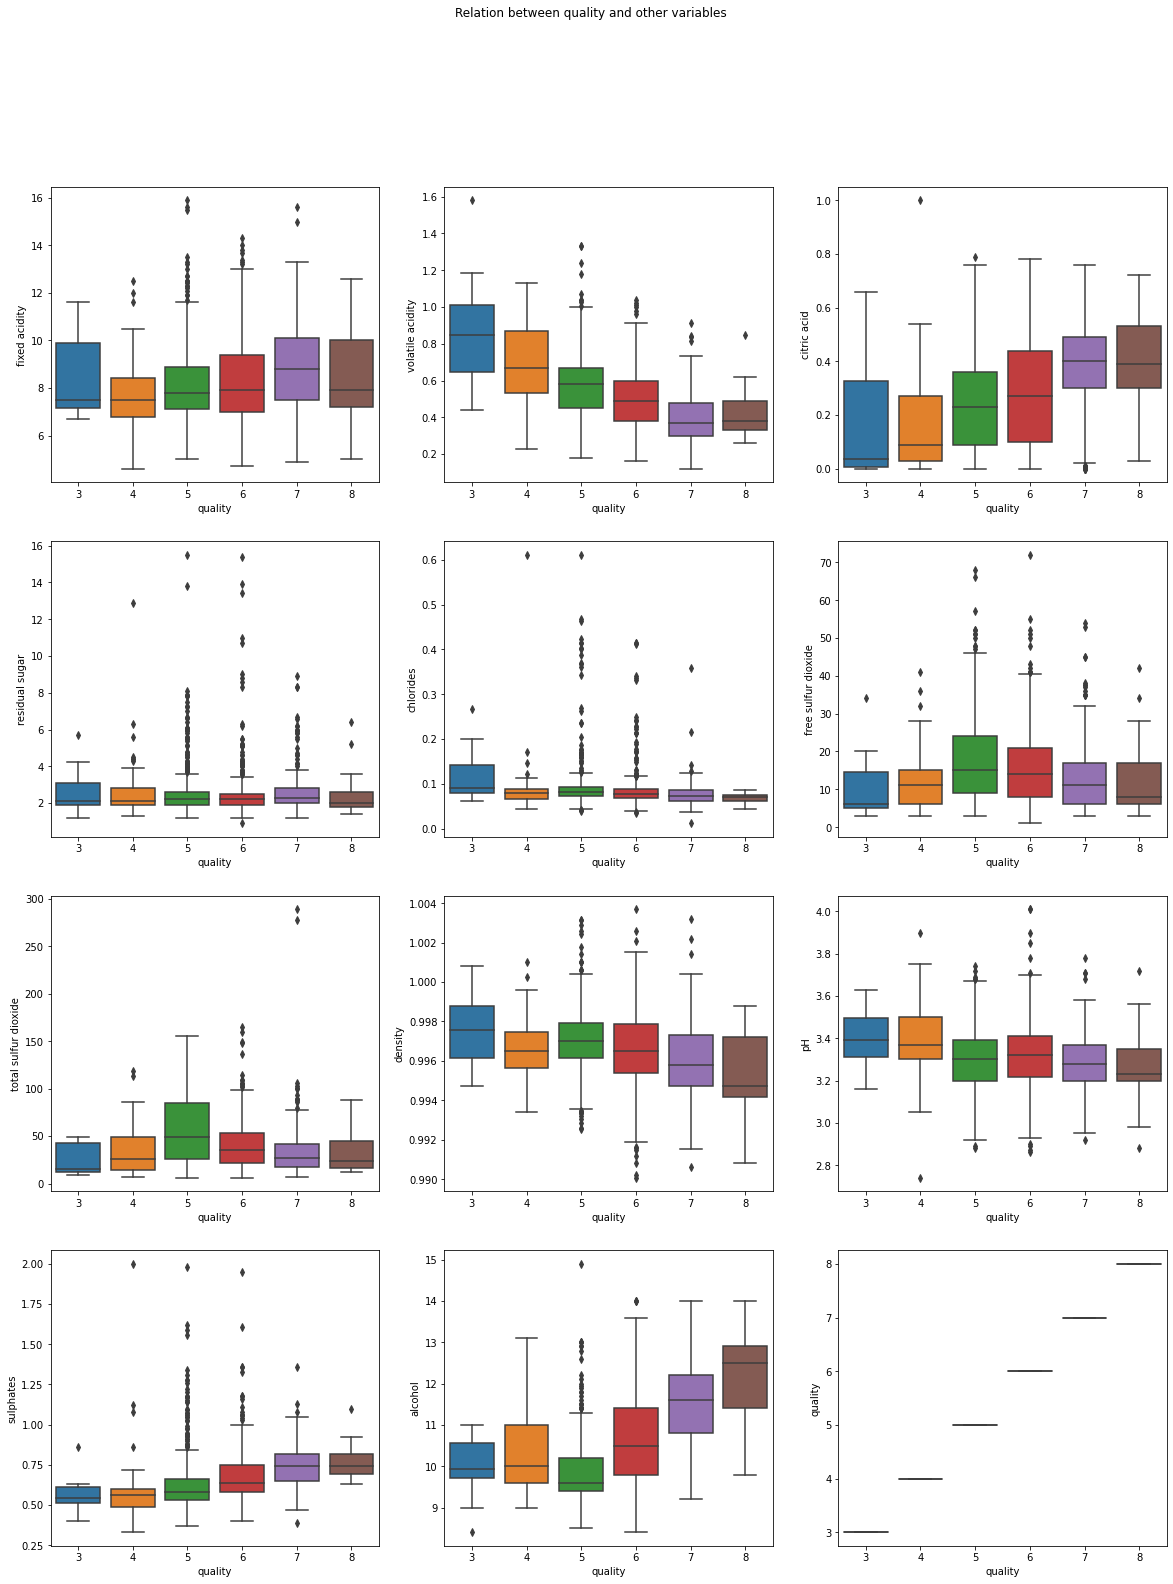

In [ ]:
%matplotlib inline
fig, axes = plt.subplots(4,3, figsize=(20,25))
fig.suptitle('Relation between quality and other variables')
sns.boxplot(ax=axes[0,0], data=wine, x='quality', y='fixed acidity')
sns.boxplot(ax=axes[0,1], data=wine, x='quality', y='volatile acidity')
sns.boxplot(ax=axes[0,2], data=wine, x='quality', y='citric acid')
sns.boxplot(ax=axes[1,0], data=wine, x='quality', y='residual sugar')
sns.boxplot(ax=axes[1,1], data=wine, x='quality', y='chlorides')
sns.boxplot(ax=axes[1,2], data=wine, x='quality', y='free sulfur dioxide')
sns.boxplot(ax=axes[2,0], data=wine, x='quality', y='total sulfur dioxide')
sns.boxplot(ax=axes[2,1], data=wine, x='quality', y='density')
sns.boxplot(ax=axes[2,2], data=wine, x='quality', y='pH')
sns.boxplot(ax=axes[3,0], data=wine, x='quality', y='sulphates')
sns.boxplot(ax=axes[3,1], data=wine, x='quality', y='alcohol')
sns.boxplot(ax=axes[3,2], data=wine, x='quality', y='quality')
#In this I used matplotlib inline because to display in the present notebook
#Here I used fix, axes because i showed all the visulizations as subplots, where axes tell where to display the picture.


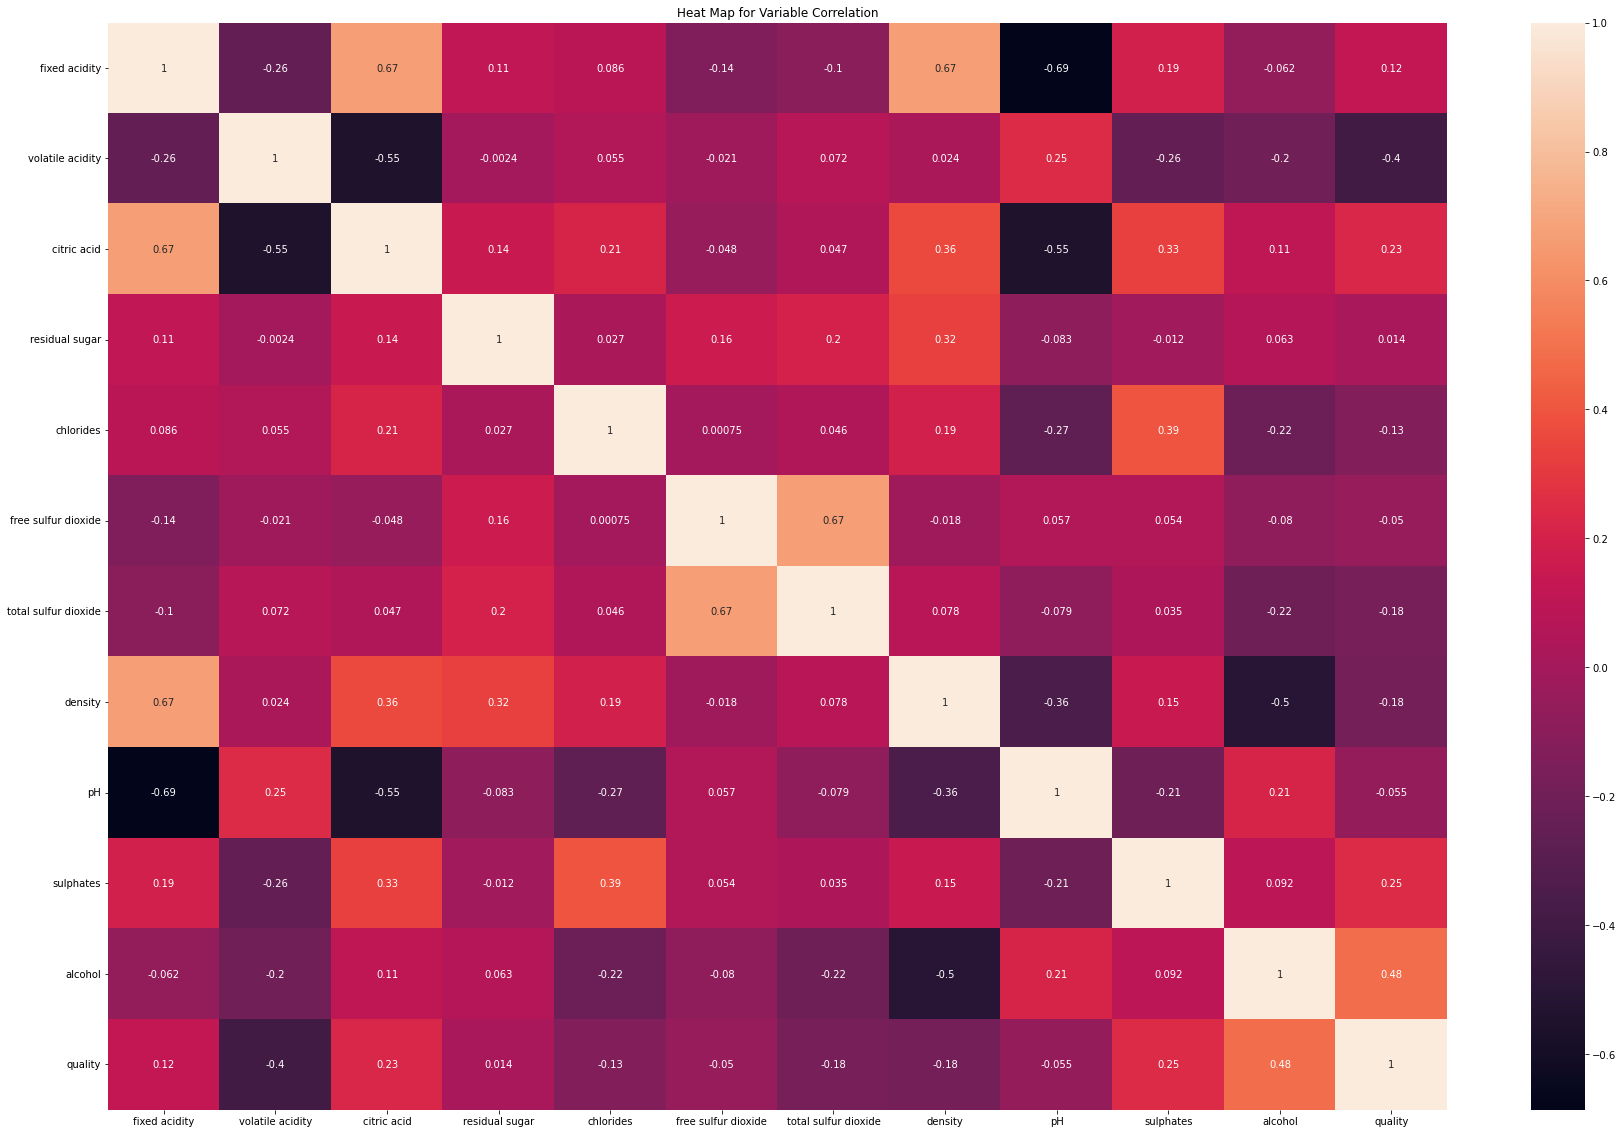

In [ ]:
plt.figure(figsize = (30,20))
plt.title('Heat Map for Variable Correlation')
sns.heatmap(wine.corr(), annot=True)
#here i used heatmap to show correlation visually

Text(33.0, 0.5, 'Truth')

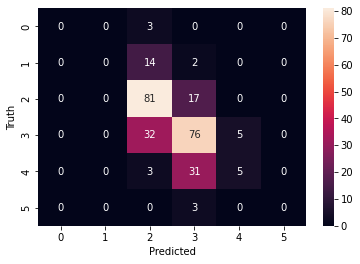

In [ ]:
sns.heatmap(CM, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')
#Here displaying the confusion matrix in heapmap